In [1]:
#Base Script
import PySimpleGUI as sg
import pandas as pd
import numpy as np
import yfinance as yf 

#ASX20
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


#Interest rate packages
import requests
import quandl




In [2]:
#Declare variables
investment_amount = float()

stock1_value = float()
stock1_name = str()
stock2_value = float()
stock2_name = str()
stock3_value = float()
stock3_name = str()
stock4_value = float()
stock4_name = str()
stock5_value = float()
stock5_name = str()
stock6_value = float()
stock6_name = str()
stock7_value = float()
stock7_name = str()
stock8_value = float()
stock8_name = str()
stock9_value = float()
stock9_name = str()
stock10_value = float()
stock10_name = str()
stock11_value = float()
stock11_name = str()
stock12_value = float()
stock12_name = str()
stock13_value = float()
stock14_name = str()
stock14_value = float()
stock15_name = str()
stock15_value = float()
stock16_name = str()
stock16_value = float()
stock17_name = str()
stock17_value = float()
stock18_name = str()
stock18_value = float()
stock19_name = str()
stock19_value = float()
stock20_name = str()
stock20_value = float()

check_value = float()
counta = 0

In [3]:

sg.theme('Material2')   # Other colours can be found in https://preview.redd.it/otneabe3zbz31.png?width=2305&format=png&auto=webp&s=7fdcf387d843f822892c724e0c6e73db038aec3d

# Layout in window
layout_tab_1 = [  [sg.Text('Stock 1 Code'),sg.InputText(size=(5,1), key='-stock_1-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 1'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_1_val')],
            #[sg.Text('Weighting of Stock 1'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_1_val')], #resolution = 0.1 for decimals
            [sg.Text('Stock 2 Code'),sg.InputText(size=(5,1), key='-stock_2-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 2'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_2_val')],
            [sg.Text('Stock 3 Code'),sg.InputText(size=(5,1), key='-stock_3-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 3'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_3_val')],
            [sg.Text('Stock 4 Code'),sg.InputText(size=(5,1), key='-stock_4-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 4'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_4_val')],
            [sg.Text('Stock 5 Code'),sg.InputText(size=(5,1), key='-stock_5-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 5'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_5_val')],
            [sg.Text('Stock 6 Code'),sg.InputText(size=(5,1), key='-stock_6-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 6'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_6_val')],
            [sg.Text('Stock 7 Code'),sg.InputText(size=(5,1), key='-stock_7-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 7'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_7_val')],
            [sg.Text('Stock 8 Code'),sg.InputText(size=(5,1), key='-stock_8-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 8'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_8_val')],
            [sg.Text('Stock 9 Code'),sg.InputText(size=(5,1), key='-stock_9-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 9'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_9_val')],
            [sg.Text('Stock 10 Code'),sg.InputText(size=(5,1), key='-stock_10-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 10'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_10_val')]
          
         ]

layout_tab_2 = [  
            [sg.Text('Stock 11 Code'),sg.InputText(size=(5,1), key='-stock_11-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 11'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_11_val')],
            [sg.Text('Stock 12 Code'),sg.InputText(size=(5,1), key='-stock_12-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 12'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_12_val')],
            [sg.Text('Stock 13 Code'),sg.InputText(size=(5,1), key='-stock_13-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 13'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_13_val')],
            [sg.Text('Stock 14 Code'),sg.InputText(size=(5,1), key='-stock_14-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 14'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_14_val')],
            [sg.Text('Stock 15 Code'),sg.InputText(size=(5,1), key='-stock_15-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 15'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_15_val')],
            [sg.Text('Stock 16 Code'),sg.InputText(size=(5,1), key='-stock_16-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 16'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_16_val')],
            [sg.Text('Stock 17 Code'),sg.InputText(size=(5,1), key='-stock_17-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 17'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_17_val')],
            [sg.Text('Stock 18 Code'),sg.InputText(size=(5,1), key='-stock_18-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 18'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_18_val')],
            [sg.Text('Stock 19 Code'),sg.InputText(size=(5,1), key='-stock_19-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 19'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_19_val')],
            [sg.Text('Stock 20 Code'),sg.InputText(size=(5,1), key='-stock_20-'),sg.Text('ASX 3 letter code only'),sg.Text('Weighting of Stock 20'), sg.Slider(range=(0.00,100.00), orientation='h', size=(15,20), key='-stock_20_val')],
         ]

layout_tab_3 = [[sg.Text('Investment Amount'),sg.InputText(size=(10,1), key='-invest_amt-')]
        ]
#layout = [  [sg.TabGroup([[sg.Tab('First 10 Stocks', layout_tab_1, tooltip = 'inputs for first 10 stocks'), sg.Tab('Second 10 Stocks', layout_tab_2, tooltip = 'inputs for second 10 stocks')]],
#            [sg.Button('Ok'), sg.Button('Cancel')],
#            [sg.Button('Check Weighting to see if it is 100%'), sg.Txt(size=(8,1), key='-CHECK-')] 
#         ]
                         
#layout = [[sg.TabGroup([[sg.Tab('First 10 Stocks', layout_tab_1, tooltip = 'inputs for first 10 stocks'), sg.Tab('Second 10 Stocks', layout_tab_2)]], tooltip = 'inputs for second 10 stocks')],    
layout = [[sg.TabGroup([[sg.Tab('Investment Amount', layout_tab_3),sg.Tab('First 10 Stocks', layout_tab_1, tooltip = 'inputs for first 10 stocks'), sg.Tab('Second 10 Stocks', layout_tab_2)]], tooltip = 'inputs for second 10 stocks')],    
            [sg.Button('Ok'), sg.Button('Cancel')],
            [sg.Button('Check Weighting to see if it is 100%'), sg.Txt(size=(8,1), key='-CHECK-')] 
            
                       ]   
                         

# Create the Window
window = sg.Window('Window Title', layout)

# Event Loop to process "events" and get the "values" of the inputs
while True:
    event, values = window.read()

    investment_amount =  float(values['-invest_amt-'])
    
#loop to work out if weighting adds up to 100% or not 
    if event == 'Check Weighting to see if it is 100%':
        stock1_value =  float(values['-stock_1_val'])
        stock2_value =  float(values['-stock_2_val'])
        stock3_value =  float(values['-stock_3_val'])
        stock4_value =  float(values['-stock_4_val'])
        stock5_value =  float(values['-stock_5_val'])
        stock6_value =  float(values['-stock_6_val'])
        stock7_value =  float(values['-stock_7_val'])
        stock8_value =  float(values['-stock_8_val'])        
        stock9_value =  float(values['-stock_9_val'])
        stock10_value =  float(values['-stock_10_val'])
        stock11_value =  float(values['-stock_11_val'])
        stock12_value =  float(values['-stock_12_val'])
        stock13_value =  float(values['-stock_13_val'])
        stock14_value =  float(values['-stock_14_val'])
        stock15_value =  float(values['-stock_15_val'])
        stock16_value =  float(values['-stock_16_val'])        
        stock17_value =  float(values['-stock_17_val'])
        stock18_value =  float(values['-stock_18_val'])
        stock19_value =  float(values['-stock_19_val'])
        stock20_value =  float(values['-stock_20_val'])
        check_value = stock1_value + stock2_value + stock3_value + stock4_value + stock5_value + stock6_value + stock7_value + stock8_value + stock9_value + stock10_value + stock11_value + stock12_value + stock13_value + stock14_value + stock15_value + stock16_value + stock17_value + stock18_value + stock19_value + stock20_value
        window['-CHECK-'].update(check_value)

#loop to store value or display error message
    if event == 'Ok':
        
        #store values input
        stock1_value =  float(values['-stock_1_val'])
        stock1_name = str(values['-stock_1-']).upper()
        stock2_value =  float(values['-stock_2_val'])
        stock2_name = str(values['-stock_2-']).upper()
        stock3_value =  float(values['-stock_3_val'])
        stock3_name = str(values['-stock_3-']).upper()
        stock4_value =  float(values['-stock_4_val'])
        stock4_name = str(values['-stock_4-']).upper()
        stock5_value =  float(values['-stock_5_val'])
        stock5_name = str(values['-stock_5-']).upper()
        stock6_value =  float(values['-stock_6_val'])
        stock6_name = str(values['-stock_6-']).upper()
        stock7_value =  float(values['-stock_7_val'])
        stock7_name = str(values['-stock_7-']).upper()
        stock8_value =  float(values['-stock_8_val'])
        stock8_name = str(values['-stock_8-']).upper()
        stock9_value =  float(values['-stock_9_val'])
        stock9_name = str(values['-stock_9-']).upper()
        stock10_value =  float(values['-stock_10_val'])
        stock10_name = str(values['-stock_10-']).upper()
        stock11_value =  float(values['-stock_11_val'])
        stock11_name = str(values['-stock_11-']).upper()
        stock12_value =  float(values['-stock_12_val'])
        stock12_name = str(values['-stock_12-']).upper()
        stock13_value =  float(values['-stock_13_val'])
        stock13_name = str(values['-stock_13-']).upper()
        stock14_value =  float(values['-stock_14_val'])
        stock14_name = str(values['-stock_14-']).upper()
        stock15_value =  float(values['-stock_15_val'])
        stock15_name = str(values['-stock_15-']).upper()
        stock16_value =  float(values['-stock_16_val'])
        stock16_name = str(values['-stock_16-']).upper()
        stock17_value =  float(values['-stock_17_val'])
        stock17_name = str(values['-stock_17-']).upper()
        stock18_value =  float(values['-stock_18_val'])
        stock18_name = str(values['-stock_18-']).upper()
        stock19_value =  float(values['-stock_19_val'])
        stock19_name = str(values['-stock_19-']).upper()
        stock20_value =  float(values['-stock_20_val'])
        stock20_name = str(values['-stock_20-']).upper()
        check_value = stock1_value + stock2_value + stock3_value + stock4_value + stock5_value + stock6_value + stock7_value + stock8_value + stock9_value + stock10_value + stock11_value + stock12_value + stock13_value + stock14_value + stock15_value + stock16_value + stock17_value + stock18_value + stock19_value + stock20_value
        #if statement to check if values input equals 100%
        if check_value  == 100:
            #check if stock input is 3 characters or not
            if len(stock1_name) != 3 and stock1_value != 0:
                sg.popup(f'Stock One Input {stock1_name} is not 3 letters')
            elif len(stock2_name) != 3 and stock2_value != 0:
                sg.popup(f'Stock Two Input {stock2_name} is not 3 letters')
            elif len(stock3_name) != 3 and stock3_value != 0:
                sg.popup(f'Stock Three Input {stock3_name} is not 3 letters')            
            elif len(stock4_name) != 3 and stock4_value != 0:
                sg.popup(f'Stock Four Input {stock4_name} is not 3 letters')     
            elif len(stock5_name) != 3 and stock5_value != 0:
                sg.popup(f'Stock Five Input {stock5_name} is not 3 letters')     
            elif len(stock6_name) != 3 and stock6_value != 0:
                sg.popup(f'Stock Six Input {stock6_name} is not 3 letters')     
            elif len(stock7_name) != 3 and stock7_value != 0:
                sg.popup(f'Stock Seven Input {stock7_name} is not 3 letters')     
            elif len(stock8_name) != 3 and stock8_value != 0:
                sg.popup(f'Stock Eight Input {stock8_name} is not 3 letters')     
            elif len(stock9_name) != 3 and stock9_value != 0:
                sg.popup(f'Stock Nine Input {stock9_name} is not 3 letters')     
            elif len(stock10_name) != 3 and stock10_value != 0:
                sg.popup(f'Stock Ten Input {stock10_name} is not 3 letters')            
            elif len(stock11_name) != 3 and stock11_value != 0:
                sg.popup(f'Stock 11 Input {stock11_name} is not 3 letters')     
            elif len(stock12_name) != 3 and stock12_value != 0:
                sg.popup(f'Stock 12 Input {stock12_name} is not 3 letters')     
            elif len(stock13_name) != 3 and stock13_value != 0:
                sg.popup(f'Stock 13 Input {stock13_name} is not 3 letters')     
            elif len(stock14_name) != 3 and stock14_value != 0:
                sg.popup(f'Stock 14 Input {stock14_name} is not 3 letters')     
            elif len(stock15_name) != 3 and stock15_value != 0:
                sg.popup(f'Stock 15 Input {stock15_name} is not 3 letters')     
            elif len(stock16_name) != 3 and stock16_value != 0:
                sg.popup(f'Stock 16 Input {stock16_name} is not 3 letters')    
            elif len(stock17_name) != 3 and stock17_value != 0:
                sg.popup(f'Stock 17 Input {stock17_name} is not 3 letters')            
            elif len(stock18_name) != 3 and stock18_value != 0:
                sg.popup(f'Stock 18 Input {stock18_name} is not 3 letters')     
            elif len(stock19_name) != 3 and stock19_value != 0:
                sg.popup(f'Stock 19 Input {stock19_name} is not 3 letters')     
            elif len(stock20_name) != 3 and stock20_value != 0:
                sg.popup(f'Stock 20 Input {stock20_name} is not 3 letters')                 
                
                
            #if total weighting is 100% and stock inputs are 3 characters, then print this
            else:            
                sg.popup(f'Data received, program will now continue to run')
                break
        #if stock names are 3 characters but does not add up to 100% then print this
        else:
            sg.popup(f'Weighting of Stocks does not equal 100, it is currently {check_value}')

#loop for cancel button of close window
    if event == sg.WIN_CLOSED or event == 'Cancel': # if user closes window or clicks cancel
        break

window.close()


* Error performing wm_overrideredirect *


In [6]:
print(f'{stock1_name} at {stock1_value}')
print(f'{stock2_name} at {stock2_value}')
print(f'{stock3_name} at {stock3_value}')
print(f'{stock4_name} at {stock4_value}')
print(f'{stock5_name} at {stock5_value}')
print(f'{stock6_name} at {stock6_value}')
print(f'{stock7_name} at {stock7_value}')
print(f'{stock8_name} at {stock8_value}')
print(f'{stock9_name} at {stock9_value}')
print(f'{stock10_name} at {stock10_value}')
print(f'{stock11_name} at {stock11_value}')
print(f'{stock12_name} at {stock12_value}')
print(f'{stock13_name} at {stock13_value}')
print(f'{stock14_name} at {stock14_value}')
print(f'{stock15_name} at {stock15_value}')
print(f'{stock16_name} at {stock16_value}')
print(f'{stock17_name} at {stock17_value}')
print(f'{stock18_name} at {stock18_value}')
print(f'{stock19_name} at {stock19_value}')
print(f'{stock20_name} at {stock20_value}')
print(f'{investment_amount}')

WOW at 30.0
FLT at 30.0
NAB at 30.0
SUN at 10.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
 at 0.0
10000.0


In [4]:
blank_column_names = ["BLANK"]
blank_index_name = ['Date']
blank_index_values = pd.date_range(start='1/1/2011', end='1/01/2021', freq='D')

if stock1_value > 0:

    stock1_string = stock1_name + '.AX'
    stock1 = yf.Ticker(stock1_string)

    # get historical market data
    df_stock1 = stock1.history(start = '2011-1-1', end='2021-1-1')
    df_stock1.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock1_return = df_stock1.pct_change().dropna().copy()
    df_stock1_prices = df_stock1.dropna().rename(columns={"Close":stock1_name}).copy()
    df_stock1_return.rename(columns={"Close":stock1_name}, inplace=True)

else:
    
    df_stock1_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock1_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)

In [5]:
if stock2_value > 0:

    stock2_string = stock2_name + '.AX'
    stock2 = yf.Ticker(stock2_string)

    # get historical market data
    df_stock2 = stock2.history(start = '2011-1-1', end='2021-1-1')
    df_stock2.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock2_return = df_stock2.pct_change().dropna().copy()
    df_stock2_prices = df_stock2.dropna().rename(columns={"Close":stock2_name}).copy()
    df_stock2_return.rename(columns={"Close":stock2_name}, inplace=True)

else:
    
    df_stock2_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock2_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)

In [6]:
if stock3_value > 0:

    stock3_string = stock3_name + '.AX'
    stock3 = yf.Ticker(stock3_string)

    # get historical market data
    df_stock3 = stock3.history(start = '2011-1-1', end='2021-1-1')
    df_stock3.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock3_return = df_stock3.pct_change().dropna().copy()
    df_stock3_prices = df_stock3.dropna().rename(columns={"Close":stock3_name}).copy()
    df_stock3_return.rename(columns={"Close":stock3_name}, inplace=True)

else:
    
    df_stock3_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock3_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock3_return.head()

,BHP
Date,
2011-01-05,-0.014452
2011-01-06,0.002888
2011-01-07,-0.011520
2011-01-10,-0.003810
2011-01-11,0.003600


In [7]:
if stock4_value > 0:

    stock4_string = stock4_name + '.AX'
    stock4 = yf.Ticker(stock4_string)

    # get historical market data
    df_stock4 = stock4.history(start = '2011-1-1', end='2021-1-1')
    df_stock4.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock4_return = df_stock4.pct_change().dropna().copy()
    df_stock4_prices = df_stock4.dropna().rename(columns={"Close":stock4_name}).copy()
    df_stock4_return.rename(columns={"Close":stock4_name}, inplace=True)

else:
    
    df_stock4_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock4_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock4_return.head()

,BXB
Date,
2011-01-05,-0.004262
2011-01-06,0.041370
2011-01-07,-0.008219
2011-01-10,0.006906
2011-01-11,0.001372


In [8]:
if stock5_value > 0:

    stock5_string = stock5_name + '.AX'
    stock5 = yf.Ticker(stock5_string)

    # get historical market data
    df_stock5 = stock5.history(start = '2011-1-1', end='2021-1-1')
    df_stock5.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock5_return = df_stock5.pct_change().dropna().copy()
    df_stock5_prices = df_stock5.dropna().rename(columns={"Close":stock5_name}).copy()
    df_stock5_return.rename(columns={"Close":stock5_name}, inplace=True)

else:
    
    df_stock5_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock5_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock5_return.head()

,CBA
Date,
2011-01-05,-0.014227
2011-01-06,0.000802
2011-01-07,-0.000801
2011-01-10,0.003207
2011-01-11,0.004995


In [9]:
if stock6_value > 0:

    stock6_string = stock6_name + '.AX'
    stock6 = yf.Ticker(stock6_string)

    # get historical market data
    df_stock6 = stock6.history(start = '2011-1-1', end='2021-1-1')
    df_stock6.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock6_return = df_stock6.pct_change().dropna().copy()
    df_stock6_prices = df_stock6.dropna().rename(columns={"Close":stock6_name}).copy()
    df_stock6_return.rename(columns={"Close":stock6_name}, inplace=True)

else:
    
    df_stock6_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock6_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock6_return.head()


,CSL
Date,
2011-01-05,0.000550
2011-01-06,-0.001649
2011-01-07,-0.009634
2011-01-10,0.002501
2011-01-11,-0.001941


In [10]:
if stock7_value > 0:

    stock7_string = stock7_name + '.AX'
    stock7 = yf.Ticker(stock7_string)

    # get historical market data
    df_stock7 = stock7.history(start = '2011-1-1', end='2021-1-1')
    df_stock7.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock7_return = df_stock7.pct_change().dropna().copy()
    df_stock7_prices = df_stock7.dropna().rename(columns={"Close":stock7_name}).copy()
    df_stock7_return.rename(columns={"Close":stock7_name}, inplace=True)

else:
    
    df_stock7_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock7_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock7_return.head()


,GMG
Date,
2011-01-05,-0.015504
2011-01-06,-0.023622
2011-01-07,0.000000
2011-01-10,0.008065
2011-01-11,0.008000


In [11]:
if stock8_value > 0:

    stock8_string = stock8_name + '.AX'
    stock8 = yf.Ticker(stock8_string)

    # get historical market data
    df_stock8 = stock8.history(start = '2011-1-1', end='2021-1-1')
    df_stock8.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock8_return = df_stock8.pct_change().dropna().copy()
    df_stock8_prices = df_stock8.dropna().rename(columns={"Close":stock8_name}).copy()
    df_stock8_return.rename(columns={"Close":stock8_name}, inplace=True)

else:
    
    df_stock8_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock8_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock8_return.head()


,IAG
Date,
2011-01-05,0.010417
2011-01-06,0.018041
2011-01-07,-0.005063
2011-01-10,-0.010178
2011-01-11,-0.012854


In [12]:
if stock9_value > 0:

    stock9_string = stock9_name + '.AX'
    stock9 = yf.Ticker(stock9_string)

    # get historical market data
    df_stock9 = stock9.history(start = '2011-1-1', end='2021-1-1')
    df_stock9.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock9_return = df_stock9.pct_change().dropna().copy()
    df_stock9_prices = df_stock9.dropna().rename(columns={"Close":stock9_name}).copy()
    df_stock9_return.rename(columns={"Close":stock9_name}, inplace=True)

else:
    
    df_stock9_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock9_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock9_return.head()


,MQG
Date,
2011-01-05,-0.003190
2011-01-06,0.005600
2011-01-07,0.004508
2011-01-10,0.001056
2011-01-11,-0.008175


In [13]:
if stock10_value > 0:

    stock10_string = stock10_name + '.AX'
    stock10 = yf.Ticker(stock10_string)

    # get historical market data
    df_stock10 = stock10.history(start = '2011-1-1', end='2021-1-1')
    df_stock10.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock10_return = df_stock10.pct_change().dropna().copy()
    df_stock10_prices = df_stock10.dropna().rename(columns={"Close":stock10_name}).copy()
    df_stock10_return.rename(columns={"Close":stock10_name}, inplace=True)

else:
    
    df_stock10_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock10_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock10_return.head()


,NAB
Date,
2011-01-05,-0.007547
2011-01-06,0.003802
2011-01-07,-0.002946
2011-01-10,0.004221
2011-01-11,0.004204


In [14]:
if stock11_value > 0:

    stock11_string = stock11_name + '.AX'
    stock11 = yf.Ticker(stock11_string)

    # get historical market data
    df_stock11 = stock11.history(start = '2011-1-1', end='2021-1-1')
    df_stock11.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock11_return = df_stock11.pct_change().dropna().copy()
    df_stock11_prices = df_stock11.dropna().rename(columns={"Close":stock11_name}).copy()
    df_stock11_return.rename(columns={"Close":stock11_name}, inplace=True)

else:
    
    df_stock11_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock11_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock11_return.head()


,NCM
Date,
2011-01-05,-0.017509
2011-01-06,-0.011295
2011-01-07,-0.019802
2011-01-10,0.005957
2011-01-11,-0.008754


In [15]:
if stock12_value > 0:

    stock12_string = stock12_name + '.AX'
    stock12 = yf.Ticker(stock12_string)

    # get historical market data
    df_stock12 = stock12.history(start = '2011-1-1', end='2021-1-1')
    df_stock12.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock12_return = df_stock12.pct_change().dropna().copy()
    df_stock12_prices = df_stock12.dropna().rename(columns={"Close":stock12_name}).copy()
    df_stock12_return.rename(columns={"Close":stock12_name}, inplace=True)

else:
    
    df_stock12_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock12_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock12_return.head()


,RIO
Date,
2011-01-05,-0.014823
2011-01-06,0.011402
2011-01-07,-0.018131
2011-01-10,-0.001420
2011-01-11,-0.002845


In [16]:
if stock13_value > 0:

    stock13_string = stock13_name + '.AX'
    stock13 = yf.Ticker(stock13_string)

    # get historical market data
    df_stock13 = stock13.history(start = '2011-1-1', end='2021-1-1')
    df_stock13.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock13_return = df_stock13.pct_change().dropna().copy()
    df_stock13_prices = df_stock13.dropna().rename(columns={"Close":stock13_name}).copy()
    df_stock13_return.rename(columns={"Close":stock13_name}, inplace=True)

else:
    
    df_stock13_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock13_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock13_return.head()


,SCG
Date,
2011-01-05,0.011811
2011-01-06,-0.015565
2011-01-07,0.000000
2011-01-10,0.027668
2011-01-11,0.003846


In [17]:
if stock14_value > 0:

    stock14_string = stock14_name + '.AX'
    stock14 = yf.Ticker(stock14_string)

    # get historical market data
    df_stock14 = stock14.history(start = '2011-1-1', end='2021-1-1')
    df_stock14.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock14_return = df_stock14.pct_change().dropna().copy()
    df_stock14_prices = df_stock14.dropna().rename(columns={"Close":stock14_name}).copy()
    df_stock14_return.rename(columns={"Close":stock14_name}, inplace=True)

else:
    
    df_stock14_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock14_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock14_return.head()


,SUN
Date,
2011-01-05,0.009501
2011-01-06,0.021177
2011-01-07,-0.011521
2011-01-10,-0.009324
2011-01-11,-0.036471


In [18]:
if stock15_value > 0:

    stock15_string = stock15_name + '.AX'
    stock15 = yf.Ticker(stock15_string)

    # get historical market data
    df_stock15 = stock15.history(start = '2011-1-1', end='2021-1-1')
    df_stock15.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock15_return = df_stock15.pct_change().dropna().copy()
    df_stock15_prices = df_stock15.dropna().rename(columns={"Close":stock15_name}).copy()
    df_stock15_return.rename(columns={"Close":stock15_name}, inplace=True)

else:
    
    df_stock15_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock15_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock15_return.head()


,TLS
Date,
2011-01-05,-0.003571
2011-01-06,-0.003584
2011-01-07,-0.003597
2011-01-10,0.003610
2011-01-11,0.021583


In [19]:
if stock16_value > 0:

    stock16_string = stock16_name + '.AX'
    stock16 = yf.Ticker(stock16_string)

    # get historical market data
    df_stock16 = stock16.history(start = '2011-1-1', end='2021-1-1')
    df_stock16.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock16_return = df_stock16.pct_change().dropna().copy()
    df_stock16_prices = df_stock16.dropna().rename(columns={"Close":stock16_name}).copy()
    df_stock16_return.rename(columns={"Close":stock16_name}, inplace=True)

else:
    
    df_stock16_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock16_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock16_return.head()


,TCL
Date,
2011-01-05,0.011905
2011-01-06,0.005883
2011-01-07,0.017544
2011-01-10,0.005747
2011-01-11,-0.009524


In [20]:
if stock17_value > 0:

    stock17_string = stock17_name + '.AX'
    stock17 = yf.Ticker(stock17_string)

    # get historical market data
    df_stock17 = stock17.history(start = '2011-1-1', end='2021-1-1')
    df_stock17.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock17_return = df_stock17.pct_change().dropna().copy()
    df_stock17_prices = df_stock17.dropna().rename(columns={"Close":stock17_name}).copy()
    df_stock17_return.rename(columns={"Close":stock17_name}, inplace=True)

else:
    
    df_stock17_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock17_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock17_return.head()


,WES
Date,
2011-01-05,-0.023204
2011-01-06,-0.000963
2011-01-07,0.005141
2011-01-10,-0.002558
2011-01-11,0.001603


In [21]:
if stock18_value > 0:

    stock18_string = stock18_name + '.AX'
    stock18 = yf.Ticker(stock18_string)

    # get historical market data
    df_stock18 = stock18.history(start = '2011-1-1', end='2021-1-1')
    df_stock18.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock18_return = df_stock18.pct_change().dropna().copy()
    df_stock18_prices = df_stock18.dropna().rename(columns={"Close":stock18_name}).copy()
    df_stock18_return.rename(columns={"Close":stock18_name}, inplace=True)

else:
    
    df_stock18_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock18_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock18_return.head()


,WBC
Date,
2011-01-05,-0.008086
2011-01-06,0.004529
2011-01-07,-0.001353
2011-01-10,-0.003612
2011-01-11,-0.000453


In [22]:
if stock19_value > 0:

    stock19_string = stock19_name + '.AX'
    stock19 = yf.Ticker(stock19_string)

    # get historical market data
    df_stock19 = stock19.history(start = '2011-1-1', end='2021-1-1')
    df_stock19.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock19_return = df_stock19.pct_change().dropna().copy()
    df_stock19_prices = df_stock19.dropna().rename(columns={"Close":stock19_name}).copy()
    df_stock19_return.rename(columns={"Close":stock19_name}, inplace=True)

else:
    
    df_stock19_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock19_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock19_return.head()


,WPL
Date,
2011-01-05,-0.009350
2011-01-06,0.014158
2011-01-07,-0.004653
2011-01-10,0.004909
2011-01-11,0.004885


In [23]:
if stock20_value > 0:

    stock20_string = stock20_name + '.AX'
    stock20 = yf.Ticker(stock20_string)

    # get historical market data
    df_stock20 = stock20.history(start = '2011-1-1', end='2021-1-1')
    df_stock20.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
    df_stock20_return = df_stock20.pct_change().dropna().copy()
    df_stock20_prices = df_stock20.dropna().rename(columns={"Close":stock20_name}).copy()
    df_stock20_return.rename(columns={"Close":stock20_name}, inplace=True)

else:
    
    df_stock20_return = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    df_stock20_prices = pd.DataFrame(columns = blank_column_names, index = blank_index_values)
    
df_stock20_return.head()


,WOW
Date,
2011-01-05,-0.007502
2011-01-06,-0.004157
2011-01-07,-0.003036
2011-01-10,0.003426
2011-01-11,0.016313


In [24]:
Portfolio = pd.concat([df_stock1_return, df_stock2_return, df_stock3_return, df_stock4_return, df_stock5_return,
                        df_stock6_return, df_stock7_return, df_stock8_return, df_stock9_return, df_stock10_return,
                        df_stock11_return, df_stock12_return, df_stock13_return, df_stock14_return, df_stock15_return,
                        df_stock16_return, df_stock17_return, df_stock18_return, df_stock19_return, df_stock20_return
                      ], axis="columns", join="inner").fillna(0)
Portfolio.index.name = 'Date'

In [25]:
Portfolio.head()

,AMC,ANZ,BHP,BXB,CBA,CSL,GMG,IAG,MQG,NAB,NCM,RIO,SCG,SUN,TLS,TCL,WES,WBC,WPL,WOW
Date,,,,,,,,,,,,,,,,,,,,
2011-01-05,-0.014706,-0.004296,-0.014452,-0.004262,-0.014227,0.000550,-0.015504,0.010417,-0.003190,-0.007547,-0.017509,-0.014823,0.011811,0.009501,-0.003571,0.011905,-0.023204,-0.008086,-0.009350,-0.007502
2011-01-06,-0.005970,-0.003883,0.002888,0.041370,0.000802,-0.001649,-0.023622,0.018041,0.005600,0.003802,-0.011295,0.011402,-0.015565,0.021177,-0.003584,0.005883,-0.000963,0.004529,0.014158,-0.004157
2011-01-07,0.001502,-0.007363,-0.011520,-0.008219,-0.000801,-0.009634,0.000000,-0.005063,0.004508,-0.002946,-0.019802,-0.018131,0.000000,-0.011521,-0.003597,0.017544,0.005141,-0.001353,-0.004653,-0.003036
2011-01-10,-0.001499,0.001745,-0.003810,0.006906,0.003207,0.002501,0.008065,-0.010178,0.001056,0.004221,0.005957,-0.001420,0.027668,-0.009324,0.003610,0.005747,-0.002558,-0.003612,0.004909,0.003426
2011-01-11,0.010511,-0.005662,0.003600,0.001372,0.004995,-0.001941,0.008000,-0.012854,-0.008175,0.004204,-0.008754,-0.002845,0.003846,-0.036471,0.021583,-0.009524,0.001603,-0.000453,0.004885,0.016313


In [26]:
weights = [stock1_value/100, stock2_value/100, stock3_value/100, stock4_value/100, stock5_value/100,
          stock6_value/100, stock7_value/100, stock8_value/100, stock9_value/100, stock10_value/100,
          stock11_value/100, stock12_value/100, stock13_value/100, stock14_value/100, stock15_value/100,
          stock16_value/100, stock17_value/100, stock18_value/100, stock19_value/100, stock20_value/100
          ]

In [27]:
portfolio_returns = Portfolio.dot(weights)
portfolio_returns.head()

Date
2011-01-05   -0.005902
2011-01-06    0.002948
2011-01-07   -0.003947
2011-01-10    0.002331
2011-01-11   -0.000288
dtype: float64

In [28]:
portfolio_cum_returns = (portfolio_returns + 1).cumprod()

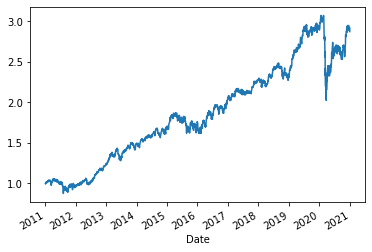

In [29]:
portfolio_cum_returns.plot()

In [30]:
portfolio_cum_returns.tail()

Date
2020-12-23    2.904541
2020-12-24    2.911339
2020-12-29    2.922867
2020-12-30    2.920169
2020-12-31    2.874170
dtype: float64

In [31]:
investment_worth = portfolio_cum_returns * investment_amount
final_investment_worth = investment_worth.iloc[-1]

In [32]:
final_investment_worth


28741.69807497865

# ASX20 Portfolio Analysis

In [33]:
Portfolio2 = pd.concat([df_stock1_prices, df_stock2_prices, df_stock3_prices, df_stock4_prices, df_stock5_prices,
                        df_stock6_prices, df_stock7_prices, df_stock8_prices, df_stock9_prices, df_stock10_prices,
                        df_stock11_prices, df_stock12_prices, df_stock13_prices, df_stock14_prices, df_stock15_prices,
                        df_stock16_prices, df_stock17_prices, df_stock18_prices, df_stock19_prices, df_stock20_prices
                      ], axis="columns", join="inner").fillna(0)
Portfolio2.index.name = 'Date'
Portfolio2

,AMC,ANZ,BHP,BXB,CBA,CSL,GMG,IAG,MQG,NAB,NCM,RIO,SCG,SUN,TLS,TCL,WES,WBC,WPL,WOW
Date,,,,,,,,,,,,,,,,,,,,
2011-01-04,3.844597,13.349269,26.426167,4.573060,28.836910,30.679083,2.254682,2.322943,22.715950,12.011321,37.177162,57.256138,1.476017,5.331303,1.639661,3.132274,12.826541,13.108433,26.155334,18.112692
2011-01-05,3.788058,13.291926,26.044264,4.553571,28.426653,30.695951,2.219726,2.347141,22.643490,11.920672,36.526218,56.407402,1.493451,5.381957,1.633805,3.169562,12.528908,13.002435,25.910782,17.976814
2011-01-06,3.765444,13.240317,26.119490,4.741952,28.449448,30.645338,2.167291,2.389486,22.770292,11.965997,36.113651,57.050568,1.470206,5.495928,1.627949,3.188207,12.516842,13.061324,26.277617,17.902077
2011-01-07,3.771098,13.142835,25.818598,4.702977,28.426653,30.350109,2.167291,2.377388,22.872944,11.930744,35.398525,56.016197,1.470206,5.432611,1.622093,3.244141,12.581195,13.043657,26.155334,17.847725
2011-01-10,3.765444,13.165774,25.720230,4.735456,28.517815,30.426025,2.184770,2.353190,22.897091,11.981106,35.609402,55.936634,1.510883,5.381957,1.627949,3.262784,12.549018,12.996548,26.283722,17.908871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,15.109823,23.100000,41.355705,10.688060,81.734398,288.057129,19.011087,4.726855,138.880005,22.980000,25.963959,113.791077,2.720000,9.694334,2.982043,13.782332,50.383244,19.559999,22.430622,39.260399
2020-12-24,15.080137,23.030001,41.842819,10.688060,81.704918,287.082092,18.892021,4.756460,140.110001,23.000000,26.053251,114.286461,2.749247,9.674829,2.982043,13.930742,50.245583,19.549999,22.609510,39.339333
2020-12-29,15.188984,23.160000,41.813587,10.697928,82.549973,286.843292,19.150000,4.776196,140.520004,23.110001,25.825062,114.217110,2.778495,9.723594,2.991950,14.000000,50.471741,19.660000,22.838091,39.191334


In [34]:
# New package PyPortfolioOpt
# Get the Optimal portfolio 

# Caluculate the expected anualized returns and sample covariance

mu = expected_returns.mean_historical_return(Portfolio2)
S = risk_models.sample_cov(Portfolio2)

In [35]:
#Optimized for the minimal Sharpe ratio 

ef = EfficientFrontier(mu, S)  #create the Efficient Frontier Object
cleaned_weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('AMC', 0.11961), ('ANZ', 0.0), ('BHP', 0.0), ('BXB', 0.0), ('CBA', 0.0), ('CSL', 0.46604), ('GMG', 0.30235), ('IAG', 0.0), ('MQG', 0.0166), ('NAB', 0.0), ('NCM', 0.0), ('RIO', 0.0), ('SCG', 0.0), ('SUN', 0.0), ('TLS', 0.0), ('TCL', 0.0954), ('WES', 0.0), ('WBC', 0.0), ('WPL', 0.0), ('WOW', 0.0)])


In [36]:
# Max return with Minimum risk 

ef.portfolio_performance(verbose = True)

Expected annual return: 22.3%
Annual volatility: 17.6%
Sharpe Ratio: 1.15


(0.222692207466131, 0.17643263448563615, 1.148836257289083)

In [38]:
# pip install pulp
# pip install cvxopt (solver GLPK_MI for assets allocation)

# Get the discrete allocation of each share per share per stock 
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

initial_investment = investment_amount
latest_prices = get_latest_prices(Portfolio2)
weights_optimised = cleaned_weights 

da = DiscreteAllocation(weights_optimised, latest_prices, total_portfolio_value = initial_investment)
allocation, leftover = da.lp_portfolio()
print('Discrete allocation', allocation)
print('Funds Remaining: $' , leftover)

Discrete allocation {'AMC': 76, 'CSL': 17, 'GMG': 158, 'MQG': 1, 'TCL': 68}
Funds Remaining: $ 1.5133132934570312


In [47]:

type(weights_optimised)
weights_optimised_list = list(weights_optimised.values())
print(weights_optimised_list)

[0.11961, 0.0, 0.0, 0.0, 0.0, 0.46604, 0.30235, 0.0, 0.0166, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0954, 0.0, 0.0, 0.0, 0.0]


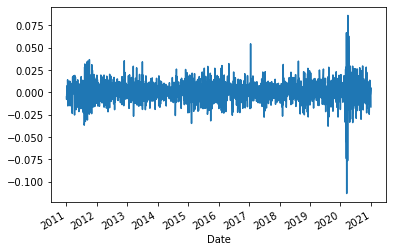

In [48]:
#optimised_portfolio_daily_returns = optimised_portfolio_df.pct_change()

portfolio2_returns = pd.concat([df_stock1_return, df_stock2_return, df_stock3_return, df_stock4_return, df_stock5_return,
                        df_stock6_return, df_stock7_return, df_stock8_return, df_stock9_return, df_stock10_return,
                        df_stock11_return, df_stock12_return, df_stock13_return, df_stock14_return, df_stock15_return,
                        df_stock16_return, df_stock17_return, df_stock18_return, df_stock19_return, df_stock20_return
                      ], axis="columns", join="inner").fillna(0)

optimised_portfolio_returns = portfolio2_returns.dot(weights_optimised_list)

optimised_portfolio_returns.plot()

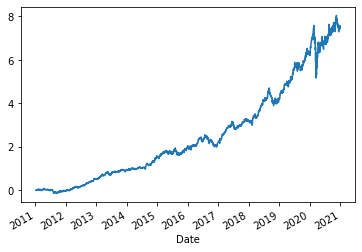

In [51]:
optimised_cumulative_returns = (optimised_portfolio_returns + 1).cumprod()-1
optimised_cumulative_returns.plot()

In [53]:
investment_worth_p2 = optimised_cumulative_returns * investment_amount
p2_investment_worth = investment_worth.iloc[-1]
print(p2_investment_worth)

28741.69807497865


# Interest Rate Section

In [54]:
interestrate = quandl.get("RBA/F01_1", start_date="2010-01-01", end_date="2020-12-31")
#interestrate.tail()
month_by_month_cashrate = interestrate['Cash Rate Target. Units: Per cent; Series ID: FIRMMCRT']
month_by_month_cashrate_df = pd.DataFrame(month_by_month_cashrate)
month_by_month_cashrate_df.rename(columns = {'Cash Rate Target. Units: Per cent; Series ID: FIRMMCRT':'RBA_Rate'}, inplace = True)

#money_borrowed = investment_amount
 
month_by_month_cashrate_df.tail(10)

,RBA_Rate
Date,
2020-03-31,0.43
2020-04-30,0.25
2020-05-31,0.25
2020-06-30,0.25
2020-07-31,0.25
2020-08-31,0.25
2020-09-30,0.25
2020-10-31,0.25
2020-11-30,0.11


In [55]:
month_by_month_cashrate_df.describe()


,RBA_Rate
count,132.000000
mean,2.391856
std,1.332457
min,0.100000
25%,1.500000
50%,2.000000
75%,3.329375
max,4.750000


In [56]:
# Program to calculate compound interest

# First calculate the compound interest for principal using formula: A = P (1 + r/n)**(nt)
# r = annual interest rate
# n = number of compounds per period (usually in months)
# t = time

def compundedinterest (interestrate_input):
	principal = investment_amount
	annualrate_pct = interestrate_input
	numberoftimescompounded = 12
	years = 10
	annualrate = (float(annualrate_pct))/100
	#print ("The principal entered is: ", principal)
	#print ("The annual rate in decimal form is: ", annualrate)
	#print ("The number of times it will be compounded per year is: ", numberoftimescompounded)
	#print ("The number of years it will be compounded: ", years)
	# calculate compound interest plus the principal
	preliminarynumber = (1 + (annualrate/numberoftimescompounded))
	raisedtopower = (numberoftimescompounded * years)
	totalamount = principal * (preliminarynumber**raisedtopower)
	#totalamount = round((totalamount,2))
	return totalamount

#print(f"{investment_amount} deposited in 10 years will equal to:")

Mean_Principal_plus_Interest = compundedinterest (month_by_month_cashrate_df.mean())
#print(f"   Using Historical Mean_Principal_plus_Interest: {Mean_Principal_plus_Interest}")

Min_Principal_plus_Interest = compundedinterest (month_by_month_cashrate_df.min())
#print(f"   Using MINIMUM_Principal_plus_Interest: {Min_Principal_plus_Interest}")

Max_Principal_plus_Interest = compundedinterest (month_by_month_cashrate_df.max())
#print(f"   Using MAXIMUM_Principal_plus_Interest: {Max_Principal_plus_Interest}")



In [57]:
print(Mean_Principal_plus_Interest)
print(final_investment_worth)

12699.119258809837
28741.69807497865


In [58]:
Portfolio2 = pd.concat([df_stock1_prices, df_stock2_prices, df_stock3_prices, df_stock4_prices, df_stock5_prices,
                        df_stock6_prices, df_stock7_prices, df_stock8_prices, df_stock9_prices, df_stock10_prices,
                        df_stock11_prices, df_stock12_prices, df_stock13_prices, df_stock14_prices, df_stock15_prices,
                        df_stock16_prices, df_stock17_prices, df_stock18_prices, df_stock19_prices, df_stock20_prices
                      ], axis="columns", join="inner").fillna(0)
Portfolio2.index.name = 'Date'
Portfolio2

,AMC,ANZ,BHP,BXB,CBA,CSL,GMG,IAG,MQG,NAB,NCM,RIO,SCG,SUN,TLS,TCL,WES,WBC,WPL,WOW
Date,,,,,,,,,,,,,,,,,,,,
2011-01-04,3.844597,13.349269,26.426167,4.573060,28.836910,30.679083,2.254682,2.322943,22.715950,12.011321,37.177162,57.256138,1.476017,5.331303,1.639661,3.132274,12.826541,13.108433,26.155334,18.112692
2011-01-05,3.788058,13.291926,26.044264,4.553571,28.426653,30.695951,2.219726,2.347141,22.643490,11.920672,36.526218,56.407402,1.493451,5.381957,1.633805,3.169562,12.528908,13.002435,25.910782,17.976814
2011-01-06,3.765444,13.240317,26.119490,4.741952,28.449448,30.645338,2.167291,2.389486,22.770292,11.965997,36.113651,57.050568,1.470206,5.495928,1.627949,3.188207,12.516842,13.061324,26.277617,17.902077
2011-01-07,3.771098,13.142835,25.818598,4.702977,28.426653,30.350109,2.167291,2.377388,22.872944,11.930744,35.398525,56.016197,1.470206,5.432611,1.622093,3.244141,12.581195,13.043657,26.155334,17.847725
2011-01-10,3.765444,13.165774,25.720230,4.735456,28.517815,30.426025,2.184770,2.353190,22.897091,11.981106,35.609402,55.936634,1.510883,5.381957,1.627949,3.262784,12.549018,12.996548,26.283722,17.908871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,15.109823,23.100000,41.355705,10.688060,81.734398,288.057129,19.011087,4.726855,138.880005,22.980000,25.963959,113.791077,2.720000,9.694334,2.982043,13.782332,50.383244,19.559999,22.430622,39.260399
2020-12-24,15.080137,23.030001,41.842819,10.688060,81.704918,287.082092,18.892021,4.756460,140.110001,23.000000,26.053251,114.286461,2.749247,9.674829,2.982043,13.930742,50.245583,19.549999,22.609510,39.339333
2020-12-29,15.188984,23.160000,41.813587,10.697928,82.549973,286.843292,19.150000,4.776196,140.520004,23.110001,25.825062,114.217110,2.778495,9.723594,2.991950,14.000000,50.471741,19.660000,22.838091,39.191334


# Crypto Portfolio Analysis  

In [60]:
## Initial Imports
import datetime as dt
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


%matplotlib inline

In [61]:
## Description

In [62]:
#This portfolio is to run a scenario, where the investor is focusing not only in stock investment, but also on crypto investment. 
#The analysis will run different scenarios, including: portfolio of crypto only, portfolio of crypto/ASX stocks mix
#The result will be used to compare its performance on traditional equity indices such as: ASX20, ASX200, ASX300; or index-tracking ETFs.



In [63]:
#Getting the Data for Crypto

In [74]:
#btc_returns_csv = Path(r"E:\OneDrive\Documents\GitHub\MonashFintech2021Project1\Financial Modelling\Crypto Portfolio\Resources\BTC-USD.csv")
#BTC_daily_returns = pd.read_csv(btc_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#BTC_daily_returns.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1,inplace=True)
#BTC_daily_returns = BTC_daily_returns.rename(columns={"Adj Close":"BTC/USD"})
#BTC_daily_returns = BTC_daily_returns["2016-01-01":]



BTC = yf.Ticker("BTC-USD")

# get historical market data
df_BTC = BTC.history(start = '2016-1-1', end='2021-1-1')
df_BTC.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
BTC_daily_returns = df_BTC.pct_change()
BTC_daily_returns = BTC_daily_returns.rename(columns={"Close":"BTC/USD"})
BTC_daily_returns = BTC_daily_returns.dropna()
BTC_daily_returns

,BTC/USD
Date,
2016-01-01,0.008749
2016-01-02,-0.002063
2016-01-03,-0.007907
2016-01-04,0.007163
2016-01-05,-0.002611
...,...
2020-12-27,-0.006231
2020-12-28,0.030927
2020-12-29,0.010250


In [75]:
#eth_returns_csv = Path(r"E:\OneDrive\Documents\GitHub\MonashFintech2021Project1\Financial Modelling\Crypto Portfolio\Resources\ETH-USD.csv")
#ETH_daily_returns = pd.read_csv(eth_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
#ETH_daily_returns.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1,inplace=True)
#ETH_daily_returns = ETH_daily_returns.rename(columns={"Adj Close":"ETH/USD"})
#ETH_daily_returns = ETH_daily_returns["2016-01-01":]


ETH = yf.Ticker("ETH-USD")

# get historical market data
df_ETH = ETH.history(start = '2016-1-1', end='2021-1-1')
df_ETH.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'],axis = 1, inplace=True)
ETH_daily_returns = df_ETH.pct_change()
ETH_daily_returns = ETH_daily_returns.rename(columns={"Close":"ETH/USD"})
ETH_daily_returns = ETH_daily_returns.dropna()
ETH_daily_returns

,ETH/USD
Date,
2016-01-01,0.015513
2016-01-02,-0.011498
2016-01-03,0.037115
2016-01-04,-0.017929
2016-01-05,-0.004509
...,...
2020-12-27,0.073614
2020-12-28,0.069956
2020-12-29,0.001537


In [76]:
## Quantitative Analysis 

In [77]:
### Combine Data

In [78]:
crypto_df = pd.concat([
    BTC_daily_returns ,
    ETH_daily_returns ,
     
],axis="columns",join="inner")
crypto_df


,BTC/USD,ETH/USD
Date,,
2016-01-01,0.008749,0.015513
2016-01-02,-0.002063,-0.011498
2016-01-03,-0.007907,0.037115
2016-01-04,0.007163,-0.017929
2016-01-05,-0.002611,-0.004509
...,...,...
2020-12-27,-0.006231,0.073614
2020-12-28,0.030927,0.069956
2020-12-29,0.010250,0.001537


In [79]:
### Calculate Returns, Mean, Standard Deviation 

In [80]:
# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, crypto_means, crypto_cov_matrix):
    crypto_returns = np.sum(crypto_means*weights ) *252
    crypto_std = np.sqrt(np.dot(weights.T, np.dot(crypto_cov_matrix, weights))) * np.sqrt(252)
    return crypto_std, crypto_returns

In [81]:
#Calculate daily returns
crypto_returns = crypto_df.pct_change()
crypto_returns

,BTC/USD,ETH/USD
Date,,
2016-01-01,NaN,NaN
2016-01-02,-1.235797,-1.741160
2016-01-03,2.832572,-4.228042
2016-01-04,-1.905912,-1.483064
2016-01-05,-1.364598,-0.748490
...,...,...
2020-12-27,-1.086725,3.892537
2020-12-28,-5.962958,-0.049692
2020-12-29,-0.668559,-0.978026


Text(0, 0.5, 'daily returns')

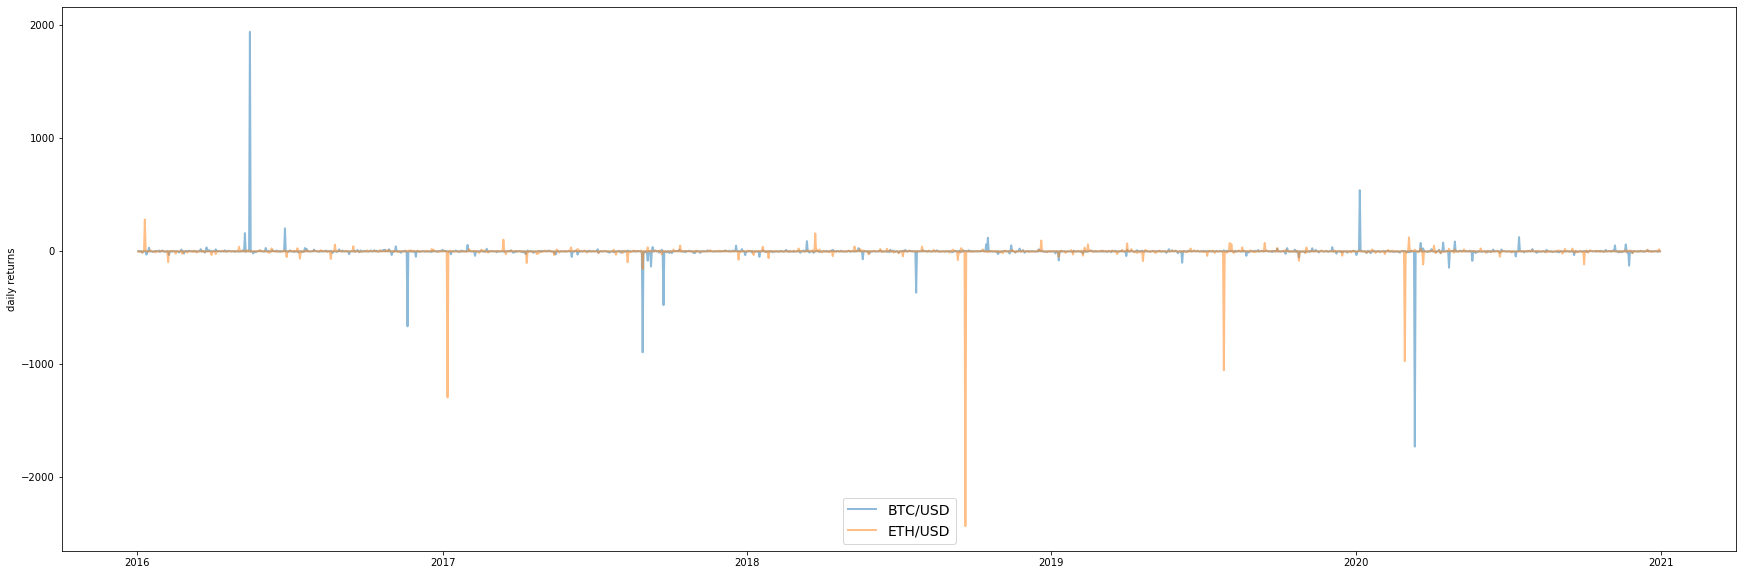

In [82]:
plt.figure(figsize=(30, 10))
for i in crypto_returns.columns.values:
    plt.plot(crypto_returns.index, crypto_returns[i], lw=2, alpha=0.5,label=i)
plt.legend(loc='lower center', fontsize=14)
plt.ylabel('daily returns')

In [83]:
#Calculate means
crypto_means = crypto_df.mean()
crypto_means

BTC/USD    0.003088
ETH/USD    0.005406
dtype: float64

In [84]:
#Calculate Standard Deviation
crypto_std = crypto_df.std()
crypto_std

BTC/USD    0.039192
ETH/USD    0.059320
dtype: float64

In [85]:
#Calculate Covariance Matrix
crypto_cov_matrix = crypto_returns.cov()
crypto_cov_matrix

,BTC/USD,ETH/USD
BTC/USD,4922.214993,54.625297
ETH/USD,54.625297,5487.347739


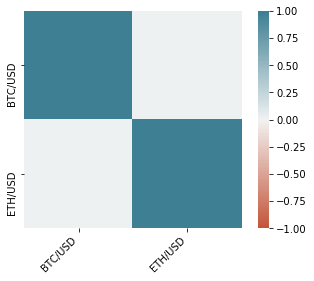

In [86]:
# Plot the correlation heatmap
crypto_corr = crypto_returns.corr()
ax = sns.heatmap(
    crypto_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [87]:
## Applying Markowitz Portfolio Theory (MPT) with Efficient Frontier

In [88]:
# Number of portfolios to simulate
num_portfolios = 10000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates (US 10-year Treasury Bond Yield)
risk_free_rate = 0.0169

In [89]:
def generate_random_portfolios(num_portfolios, crypto_means, crypto_cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our n equities
        weights = np.random.random(2)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, crypto_means, crypto_cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array

----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 1.14
Annualized Volatility: 845.04


--Allocation at max Sharpe ratio--

            BTC/USD  ETH/USD
allocation    38.41    61.59
----------------------------------------------------------------------------------------------------


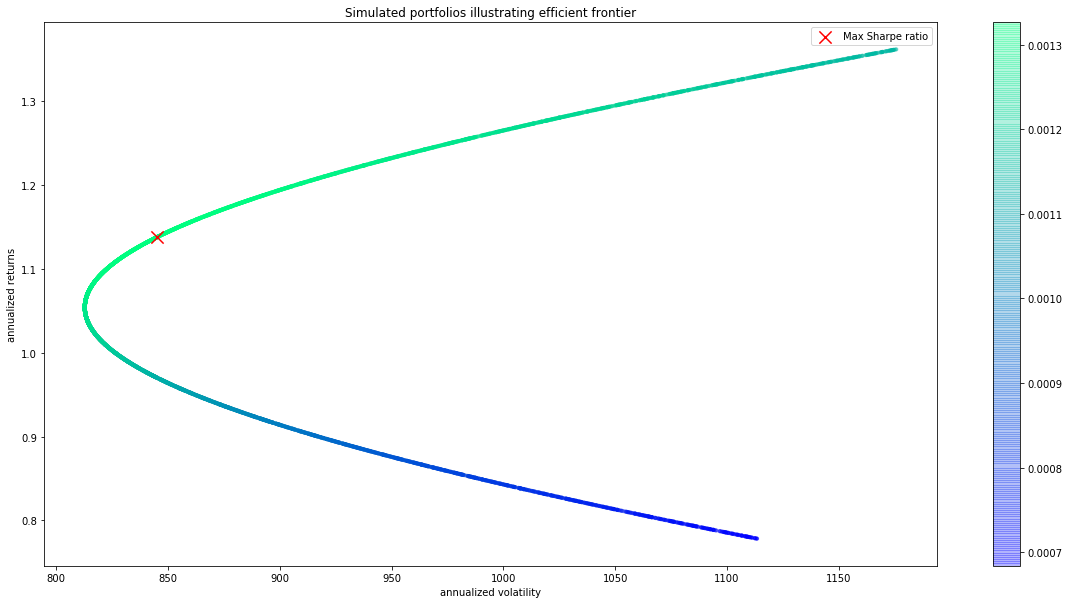

In [90]:
def display_simulated_portfolios(crypto_means, crypto_cov_matrix, num_portfolios, risk_free_rate):

    # pull results, weights from random portfolios
    results, weights = generate_random_portfolios(num_portfolios, crypto_means, crypto_cov_matrix, risk_free_rate)
    
    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    stdev_portfolio, returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=crypto_df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(returns_portfolio,2))
    print("Annualized Volatility:", round(stdev_portfolio,2))
    
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)
    
    plt.figure(figsize=(20, 10))
    # x = volatility, y = annualized return, color mapping = sharpe ratio
    plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    # Mark the portfolio w/ max Sharpe ratio
    plt.scatter(stdev_portfolio, returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')
    plt.title('Simulated portfolios illustrating efficient frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=1.2)

display_simulated_portfolios(crypto_means, crypto_cov_matrix, num_portfolios, risk_free_rate)

In [91]:
#   So what is happening to this formula? 
#   Before we dive in, we need to understand the concept of max Sharpe Ratio: 
##  The ratio is commonly used as a means of calculating the performance of an investment after 
##  adjusting for its risk that allows investments of different risk profiles to be compared against each other.
##  Max Sharpe Ratio means that investor will choose to go with higher risk, as in this case is Bitcoin, to achieve higher return
##  The volatility gap between Bitcoin and Ethereum is significantly difference with Bitcoin volatility level is over the cloud, 
##  therefore we can see why this model choose to go all-in in Bitcoin instead of allocating a *meaningful portion* to Ethereum
##  
